In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data (Assuming it's saved as 'mall_customers.csv')
data = pd.read_csv('mall_customers.csv')

# Dropping CustomerID as it's not useful for clustering
data = data.drop('CustomerID', axis=1)

# Check for missing values
print(data.isnull().sum())  # Assuming no missing values based on your input

# Scaling features for KMeans
scaler = StandardScaler()
data[['Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(data[['Annual Income (k$)', 'Spending Score (1-100)']])


Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


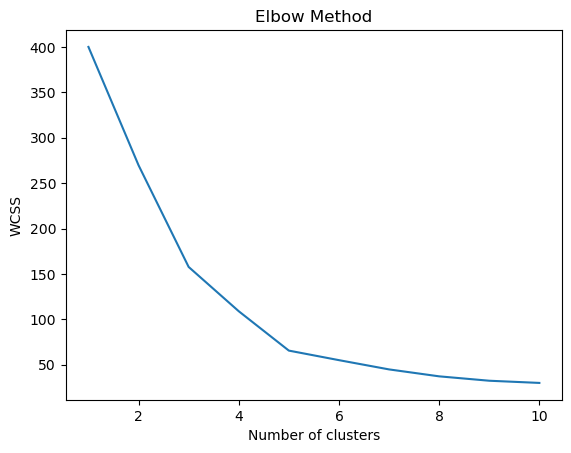

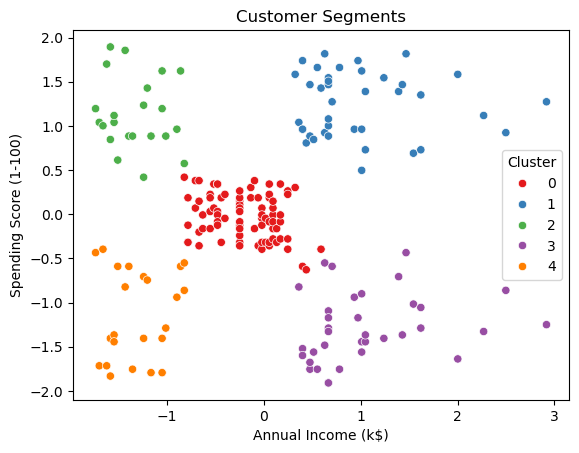

In [2]:
from sklearn.cluster import KMeans

# Use the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(data[['Annual Income (k$)', 'Spending Score (1-100)']])
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Applying KMeans to the dataset based on optimal clusters (assuming 5)
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
data['Cluster'] = kmeans.fit_predict(data[['Annual Income (k$)', 'Spending Score (1-100)']])

# Visualize clusters
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='Set1')
plt.title('Customer Segments')
plt.show()


In [3]:
# Convert 'Cluster' into one-hot encoding (transaction data format)
transaction_data = pd.get_dummies(data['Cluster'], prefix='Cluster')

# Add the original scaled features as transactions (optional, but for richer rules)
transaction_data = pd.concat([transaction_data, data[['Annual Income (k$)', 'Spending Score (1-100)']]], axis=1)

# Convert continuous features to binary (binarize them based on threshold)
transaction_data['High Income'] = (data['Annual Income (k$)'] > 0).astype(int)
transaction_data['High Spending'] = (data['Spending Score (1-100)'] > 0).astype(int)


### This code down has da problems + I don't understand any of the above hehe!

In [7]:
from mlxtend.frequent_patterns import apriori, association_rules

# Keep only the binary columns for transactions
binary_data = pd.get_dummies(data['Cluster'], prefix='Cluster')

# Convert continuous 'Annual Income' and 'Spending Score' to binary
binary_data['High Income'] = (data['Annual Income (k$)'] > 0).astype(int)
binary_data['High Spending'] = (data['Spending Score (1-100)'] > 0).astype(int)

# Convert the DataFrame to boolean type to meet Apriori requirements
binary_data = binary_data.astype(bool)

# Now run Apriori algorithm
frequent_itemsets = apriori(binary_data, min_support=0.2, use_colnames=True)

# Generate association rules (without the 'num_itemsets' argument)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

# Display the filtered rules
rules_filtered = rules[['antecedents', 'consequents', 'support', 'confidence']]
print(rules_filtered)


TypeError: association_rules() missing 1 required positional argument: 'num_itemsets'